In [1]:
# construct neuron network
import torch
import torch.nn as nn
import torch.nn.functional as F
from constants import *

class GAN_G_Net(nn.Module):

    def __init__(self):
        super(GAN_G_Net, self).__init__()
#         input shape : (batch, 100)
        
        
        in_ch = latent_dim
        out_ch = 256
            
        self.conv1 = nn.ConvTranspose2d(in_channels=in_ch, out_channels=out_ch, kernel_size=3, stride=2, padding=0)
        torch.nn.init.xavier_normal_(self.conv1.weight)
        self.conv1_bn = nn.BatchNorm2d(out_ch)
        
        in_ch = out_ch
        out_ch = out_ch//2
        self.conv2 = nn.ConvTranspose2d(in_channels=in_ch, out_channels=out_ch, kernel_size=3, stride=2, padding=1)
        torch.nn.init.xavier_normal_(self.conv2.weight)
        self.conv2_bn = nn.BatchNorm2d(out_ch)
        
        in_ch = out_ch
        out_ch = out_ch//2
        self.conv3 = nn.ConvTranspose2d(in_channels=in_ch, out_channels=out_ch, kernel_size=5, stride=2, padding=2)
        torch.nn.init.xavier_normal_(self.conv3.weight)
        self.conv3_bn = nn.BatchNorm2d(out_ch)
        
        in_ch = out_ch
        out_ch = out_ch//2
        self.conv4 = nn.ConvTranspose2d(in_channels=in_ch, out_channels=out_ch, kernel_size=7, stride=2, padding=2)
        torch.nn.init.xavier_normal_(self.conv4.weight)
        self.conv4_bn = nn.BatchNorm2d(out_ch)
        
        in_ch = out_ch
        out_ch = 3
        self.conv5 = nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=4, stride=1, padding=0)
        torch.nn.init.xavier_normal_(self.conv5.weight)
        

    def forward(self, x):
        
        x = x.repeat(1,16)
        x = x.view(-1, 4, 4, latent_dim)
        
        x = x.permute(0,3,2,1)
        
#         print x.size(),'x size'
        x = self.conv1(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv1_bn(x)
#         print x.size(),'x size'
        
        x = self.conv2(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv2_bn(x)
#         print x.size(),'x size'
        
        x = self.conv3(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv3_bn(x)
#         print x.size(),'x size'
        
        x = self.conv4(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv4_bn(x)
#         print x.size(),'x size'
        
        x = self.conv5(x)
        x = F.tanh(x)
#         print x.size(),'x size'
        
        return x
    
class GAN_D_Net(nn.Module):

    def __init__(self):
        super(GAN_D_Net, self).__init__()
#         input shape : (batch, 3, 64, 64)
        
        
        in_ch = 3
        out_ch = 16
            
        self.conv1 = nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=7, stride=2, padding=3)
        torch.nn.init.xavier_normal_(self.conv1.weight)
        self.conv1_bn = nn.BatchNorm2d(out_ch)
        
        in_ch = out_ch
        out_ch = out_ch*2
        self.conv2 = nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=5, stride=2, padding=2)
        torch.nn.init.xavier_normal_(self.conv2.weight)
        self.conv2_bn = nn.BatchNorm2d(out_ch)
        
        in_ch = out_ch
        out_ch = out_ch*2
        self.conv3 = nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=3, stride=2, padding=1)
        torch.nn.init.xavier_normal_(self.conv3.weight)
        self.conv3_bn = nn.BatchNorm2d(out_ch)
        
        in_ch = out_ch
        out_ch = out_ch*2
        self.conv4 = nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=3, stride=2, padding=1)
        torch.nn.init.xavier_normal_(self.conv4.weight)
        self.conv4_bn = nn.BatchNorm2d(out_ch)
        
        in_ch = out_ch
        out_ch = out_ch*2
        self.conv5 = nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=4, stride=1, padding=0)
        torch.nn.init.xavier_normal_(self.conv5.weight)
        self.conv5_bn = nn.BatchNorm2d(out_ch)
        
        in_ch = out_ch
        out_ch = 1
        self.conv6 = nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=1, stride=1, padding=0)
        torch.nn.init.xavier_normal_(self.conv6.weight)
        
    def forward(self, x):
        
#         print x.size(),'x size'
        x = self.conv1(x)
        x = F.leaky_relu(x, 0.2)
        x = self.conv1_bn(x)
#         print x.size(),'x size'
        
        x = self.conv2(x)
        x = self.conv2_bn(x)
#         print x.size(),'x size'
        
        x = self.conv3(x)
        x = self.conv3_bn(x)
#         print x.size(),'x size'
        
        x = self.conv4(x)
        x = self.conv4_bn(x)
#         print x.size(),'x size'
        
        x = self.conv5(x)
        x = self.conv5_bn(x)
#         print x.size(),'x size'
        
        x = self.conv6(x)
#         print x.size(),'x size'
        
        
        x = x.view(-1,self.num_flat_features(x))
        x = F.sigmoid(x)
#         print x.size(),'x size'
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for dim in size:
            num_features *= dim
        return num_features
G_net = GAN_G_Net()
# torch.nn.init.xavier_uniform(conv1.weight)
D_net = GAN_D_Net()
x = torch.randn(28, latent_dim)
# x = torch.arange(15).view(3,5)
# print x
y = G_net(x)
# print G_net
z = D_net(y)

# print c.


In [2]:
# loss function
# D_net
D_criterion = nn.BCELoss()
D_opt = torch.optim.RMSprop(D_net.parameters(), lr=0.0002)

# G_net
G_opt = torch.optim.RMSprop(G_net.parameters(), lr=0.0001)



In [3]:
from IPython.display import display
from constants import channel_first
from PIL import Image
def showX(X, rows=1):
    assert X.shape[0]%rows == 0
    
    if channel_first:
        _, dep, h, w = X.shape
        int_X = np.moveaxis(X.reshape(-1,3,h,w), 1, 3)
    else:
        _, h, w, dep = X.shape
        int_X = X.reshape(-1,h,w, 3)
    int_X = int_X.reshape(rows, -1, h, w,3).swapaxes(1,2).reshape(rows*w,-1, 3)
    display(Image.fromarray(int_X))
    return int_X
from anime_face_preprocess import iterative_generator
img_g = iterative_generator()

iter :   15200


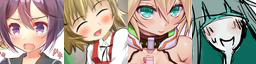

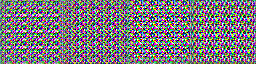

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
from anime_face_preprocess import iterative_generator
from constants import latent_dim
from IPython.display import clear_output
import numpy as np
import os


def img_preprocess(batch_img):
#     shape = (batch, 3, h, w)
    assert batch_img.dtype == np.uint8
    batch_img = (batch_img-127.5)/127.5
    return batch_img
def img_postprocess(batch_img):
#     shape = (batch, 3, h, w)
    batch_img = (batch_img+1.) * 127.5
    batch_img = np.clip(batch_img, 0, 255)
    batch_img = batch_img.astype(np.uint8)
    
    return batch_img
# environment
with_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if with_gpu else "cpu")
D_model = D_net.to(device)
G_model = G_net.to(device)
output_path = os.path.join('./','data','outputs')
if not os.path.isdir(output_path):
    os.mkdir(output_path)
# training setting


batch_size = 4
iter_limit = 200000
G_update_rate = 2
display_iter = 100

# img_g = iterative_generator()

for it in range(iter_limit):
    
#     prepare true imgs
    original_imgs, tag = img_g.send(batch_size)
    true_imgs = img_preprocess(original_imgs)
    true_imgs = true_imgs.astype(np.float32)
    true_imgs = torch.from_numpy(true_imgs)
    true_imgs = true_imgs.to(device)
    
    
#     prepare fake imgs
    normal_latent = np.random.normal(size=[batch_size, latent_dim])
    normal_latent = normal_latent.astype(np.float32)
    normal_latent= torch.from_numpy(normal_latent)
    normal_latent = normal_latent.to(device)
    fake_imgs = G_net(normal_latent)
    
#     D
    labels = torch.zeros([batch_size*2, 1])
    batch_imgs = torch.cat([true_imgs, fake_imgs], dim=0)
    labels[:batch_size, 0] = 1
    labels = labels.to(device)
    
    D_opt.zero_grad()
    D_outputs = D_net(batch_imgs)
    D_loss = D_criterion(D_outputs, labels)
    D_loss.backward()
    D_opt.step()
    
#     G
    if (it+1) % G_update_rate == 0:
        G_opt.zero_grad()
        
        fake_imgs = G_net(normal_latent)
        
        labels = torch.ones([batch_size, 1])
        labels = labels.to(device)

        D_outputs = D_net(fake_imgs)
        D_loss = D_criterion(D_outputs, labels)
        D_loss.backward()
#         c = G_net.conv1.named_parameters()
#         for n, params in c:
#             print n,params.grad
#             break
#         break
    
        G_opt.step()
#     
    if (it+1) % display_iter == 0:
        clear_output()
        G_imgs = img_postprocess(fake_imgs.cpu().detach().numpy())
        print 'iter : %7d' % (it+1)
        showX(original_imgs)
        out_img = showX(G_imgs)
        out_img = Image.fromarray(out_img)
        out_img.save(os.path.join(output_path,'%d.png' % (it+1)))


